# LSTM with PyTorch

- LSTM networks are an extension of recurrent neural networks (RNNs) mainly introduced to handle situations where RNNs fail.

- RNN is a network that works on the present input by taking into consideration the previous output (feedback) and storing in its memory for a short period of time (short-term memory).

- Thus an LSTM recurrent unit tries to "remember" all the past knowledge that the network is seen so far and to "forget" irrelevant data. This is done by introducing different activation function layers called "gates" for different purposes.

- Each LSTM recurrent unit has cell state which is the memory of the LSTM cell and hiddens state which is the output of this cell.

### LSTM Architecture

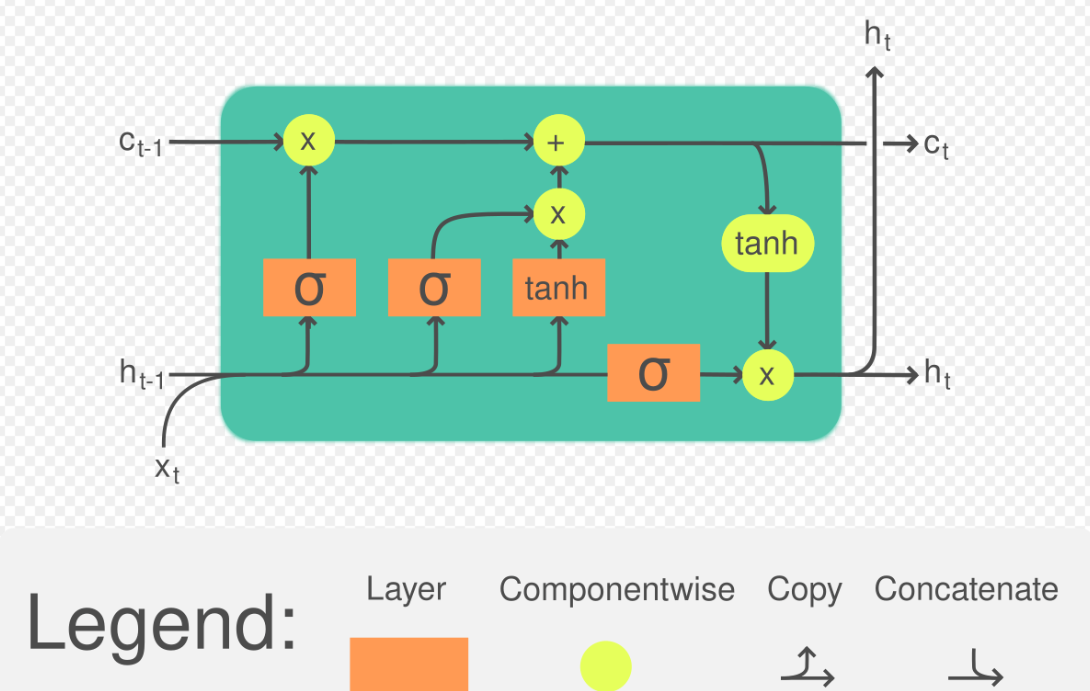

- It consists of four layers that interact with one another in a way to produce the output of that cell. These two things are then passed onto the next hidden layer
- RNNs have single neural net layer of tanh, LSTM comprises three sigmoid gates and one tanh layer
- They determine which part of the information will be needed by the next cell & which part is to be discarded
- ht-1: ht−1 refers to the hidden state from the previous time step t−1
- ct is the current state/memory

### 1. Importing relevant libraries

In [1]:
    # !pip install matplotlib==3.8.2
    # !pip install numpy==1.26.2
    # !pip install pandas==2.1.4
    # !pip install scikit_learn==1.4.2
    # !pip install seaborn==0.13.2
    # !pip install torch==2.2.2
    # !pip install torchvision==0.17.2

In [2]:
import re
import nltk
import time
import torch
import string
import numpy as np
import pandas as pd
import torch.nn as nn
# import tensorflow as tf
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# from tensorflow import keras
from nltk import PorterStemmer
import torch.nn.functional as F
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('../Input/review_data (1).csv')
data.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1500 non-null   object
 1   userName              1500 non-null   object
 2   userImage             1500 non-null   object
 3   content               1500 non-null   object
 4   score                 1500 non-null   int64 
 5   thumbsUpCount         1500 non-null   int64 
 6   reviewCreatedVersion  1500 non-null   object
 7   at                    1500 non-null   object
 8   replyContent          523 non-null    object
 9   repliedAt             523 non-null    object
dtypes: int64(2), object(8)
memory usage: 117.3+ KB


In [6]:
pd.set_option('display.max_colwidth', None)

In [7]:
data = data[['content','score']]
data.head(3)

,content,score
0,Overall it's really an amazing app. I've been using this for the past 5 years however I only have one issue though and I wanted this to get address since I think this issue had lasted for how many years? The texts were blurred and when you zoom it out it's pixelated. I thought this issue only occurs on mobile apps however it was also present on the website. Please fix this. I still remember the time when I can export high definition texts and I love that experience. Thank you!,4
1,Hey! Yes I gave a 5 star rating... coz I believe it deserves it! I mostly use the desktop version and I am seriously so satisfied with this app in both android and desktop version. I just came here to thank the developers for this beautiful app and its facilities. I literally find almost everything that I need for and the best part is even without the premium feature it provides us with a lot many facilities. I love it! Thank you..! ❤,5
2,"Canva used to be a good app! But recently I've been facing issues in saving my files. When I want my files to be saved in '.png' format, it gets saved in .jpg format! Moreover when I want my files to be saved it gets stuck at the downloading screen (where your so called magic does not happen) For now you'll be getting 1 stars from me. I hope you will fix the app soon! Thank you .",1


### 2. Text Preprocessing with Regex

In [8]:
def clean_text(txt):
    
  txt = txt.lower() #Lowercase
  txt = re.sub(r'\W', ' ', str(txt)) # replace all non word characters with space 
  #iterates through each character char in txt. if char is not in string.punctuation,it is added to the list. 
  #Finally, ''.join(...) concatenates these characters back into a string.
  txt = ''.join([char for char in txt if char not in string.punctuation]).strip() #strip removes leading/trailing space 
  txt = ''.join([i for i in txt if not i.isdigit()]).strip() # remove digits ()
  txt = re.sub(r'\s+[a-zA-Z]\s+', ' ', txt)   # remove all single characters (it's -> it s then we need to remove s)
  txt = re.sub(r'\s+', ' ', txt, flags=re.I) # Substituting multiple spaces with single space
  txt = re.sub(r"(http\S+|http)", "", txt) # remove links
  #Ftemming and remove stop words  
  txt = ' '.join([PorterStemmer().stem(word=word) for word in txt.split(" ") if word not in stopwords.words('english') ]) 
  return txt

In [9]:
print('Original Text : ',data['content'][1])  
print('Processed Text : ',clean_text(data['content'][1]))

Original Text :  Hey! Yes I gave a 5 star rating... coz I believe it deserves it! I mostly use the desktop version and I am seriously so satisfied with this app in both android and desktop version. I just came here to thank the developers for this beautiful app and its facilities. I literally find almost everything that I need for and the best part is even without the premium feature it provides us with a lot many facilities. I love it! Thank you..! ❤
Processed Text :  hey ye gave star rate coz believ deserv mostli use desktop version serious satisfi app android desktop version came thank develop beauti app facil liter find almost everyth need best part even without premium featur provid us lot mani facil love thank


*Applying text preprocessing function to dataset*

In [10]:
data['content'] = data['content'].apply(clean_text)
data

,content,score
0,overal realli amaz app use past year howev one issu though want get address sinc think issu last mani year text blur zoom pixel thought issu occur mobil app howev also present websit pleas fix still rememb time export high definit text love experi thank,4
1,hey ye gave star rate coz believ deserv mostli use desktop version serious satisfi app android desktop version came thank develop beauti app facil liter find almost everyth need best part even without premium featur provid us lot mani facil love thank,5
2,canva use good app recent face issu save file want file save png format get save jpg format moreov want file save get stuck download screen call magic happen get star hope fix app soon thank,1
3,brilliant app one problem edit post doubl tap photo reposit start zoom photo time app crash restart lg se sometim go desktop version pc reposit zoom photo want resum edit back mobil,5
4,great app use make bt meme recent updat abl chang font style edit option font miss tri uninstal instal app still work edit option font appear rare previou version far better canva could pleas work,4
...,...,...
1495,absolut amaz lifesav teacher,5
1496,nice mani time show error open ppt school project disturb,3
1497,much lag alway stuck start page worst app download,1
1498,nice app colleg work mani featur templat work love,5


### 3. Data Preprocessing with Regex

In [11]:
data.score.value_counts() 

score
5    952
4    227
1    170
3     91
2     60
Name: count, dtype: int64

*We can see that class "5"  is dominating in the dataset.There is a clear class imbalance here,algorithms may struggle to properly learn and make accurate predictions for the minority class, leading to biased results and reduced performance Thus we need to. Balance the Dataset*

In [12]:
df_majority = data[data['score']==5] #Data with class 5

df_minority1= data[data['score']==2] #Data with class 2

df_minority2 = data[data['score']==3] #Data with class 3

df_minority3 = data[data['score']==1] #Data with class 1

df_minority4 = data[data['score']==4] #Data with class 4

***Upsampling the Minority class and Downsampling the Majority Class***

In [13]:
#Down Sampling Majority Class "5"
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples = 600) #952 --> 600
#Upsample Minority class  "2"
df_minority_upsampled = resample(df_minority1, 
                                 replace=True,     
                                 n_samples=200) #60-->200
#Upsample Minority class "3"
df_minority_upsampled1 = resample(df_minority2, 
                                 replace=True,     
                                 n_samples=300)
#Upsample Minority class "1"
df_minority_upsampled2 = resample(df_minority3, 
                                 replace=True,     
                                 n_samples=225)
#Upsample Minority class "4"
df_minority_upsampled3 = resample(df_minority4, 
                                 replace=True,     
                                 n_samples=250)


# Combine minority class with downsampled majority class
data1 = pd.concat([df_majority_downsampled, df_minority_upsampled,df_minority_upsampled1,df_minority_upsampled2,df_minority_upsampled3])

*The goal of resampling is typically not to make all classes have exactly the same number of samples, but rather to reduce the imbalance so that the model can learn effectively from the minority classes without being biased towards the majority class.*

In [14]:
data1.score.value_counts()

score
5    600
3    300
4    250
1    225
2    200
Name: count, dtype: int64

# Defining the Parameters and Tokenizer

In [15]:
# !pip install tensorflow==2.15.0 --upgrade --force-reinstall

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 2000 
#specifies the maximum number of unique words to be considered during tokenization based on their frequency in the dataset.
# Max number of words in each Content.
MAX_SEQUENCE_LENGTH = 600
# This is fixed. Embedding
EMBEDDING_DIM = 100
##converts all text to lowercase & removes the special characters
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data1['content'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 1340 unique tokens.


In [17]:
X = tokenizer.texts_to_sequences(data1['content'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape[1])

Shape of data tensor: 600


- *Tokenizer is a class from TensorFlow Keras that helps preprocess text data by converting text into sequences of integers (or tokens).*
- *pad_sequences is another function from TensorFlow Keras used to ensure that all sequences in a list have the same length by padding them.*

In [18]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(data1['score'])
print(Y.shape)
print(le.classes_)
Y.dtype

(1575,)
[1 2 3 4 5]


dtype('int64')

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state = 42, stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1417, 600) (1417,)
(158, 600) (158,)


*converting all of them to the tensor as PyTorch works on Tensor*

In [21]:
x_train = torch.tensor(X_train, dtype=torch.long)
y_train = torch.tensor(Y_train, dtype=torch.long)
x_cv = torch.tensor(X_test, dtype=torch.long)
y_cv = torch.tensor(Y_test, dtype=torch.long)

In [22]:
train = torch.utils.data.TensorDataset(x_train, y_train)
valid = torch.utils.data.TensorDataset(x_cv, y_cv)

In [23]:
# Defing the Parameters:
max_features =  2000  
batch_size = 50
vocab_size = max_features

# Initialising the DataLoaders
train_dl = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
val_dl = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

### 4. Model Building: Developing LSTM Neural Network

In [24]:

class LSTM(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim) : # 
        super().__init__()
        self.hidden_dim = hidden_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        #self.drop  = nn.Dropout(p=0.2)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.lstm1 = nn.LSTM(hidden_dim, 64, batch_first=True)
        self.linear = nn.Linear(64, 5)
        #self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.embeddings(x)
        #x = self.drop(x)
        out_pack, (ht, ct) = self.lstm(x)
        out_pack1, (ht, ct) = self.lstm1(out_pack)
        out = self.linear(ht[-1])
        #out = self.softmax(out)
        return out

In [25]:
#intializing model
model = LSTM(vocab_size, 128,64)
print(model)

LSTM(
  (embeddings): Embedding(2000, 128, padding_idx=0)
  (lstm): LSTM(128, 64, batch_first=True)
  (lstm1): LSTM(64, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=5, bias=True)
)


- #128 x #64
- #64 x #64

# Model Tranining And Validation

In [26]:
# Defining Train Loop:

n_epochs = 10

loss_fn = nn.CrossEntropyLoss() # Loss Function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Optimiser

# model.cuda() # Moving Model Into GPU
# loss_fn.cuda() # Moving Loss Function Into GPU

train_loss = []
valid_loss = []
for epoch in range(n_epochs):
      start_time = time.time()



    # Set model to train configuration
      model.train() # indicator for training
      avg_loss = 0.  
      for i, (x_batch, y_batch) in enumerate(train_dl):
#           x_batch = x_batch.cuda()
#           y_batch = y_batch.cuda()


          # Predict/Forward Pass
          y_pred = model(x_batch)



          # Compute loss
          loss = loss_fn(y_pred, y_batch)
          optimizer.zero_grad()
          loss.backward() 
          optimizer.step()
          avg_loss += loss.item() / len(train_dl)
          



      # Set model to validation configuration
      model.eval() # Indicator for Validation       
      avg_val_loss = 0.
      val_preds = np.zeros((len(x_cv),len(le.classes_)))
    
      for i, (x_batch, y_batch) in enumerate(val_dl):
          y_pred = model(x_batch).detach()
          avg_val_loss += loss_fn(y_pred, y_batch).item() / len(val_dl)

           #keep/store predictions

          val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred,dim=1).cpu().numpy()
          
          # Check Accuracy
      val_accuracy = sum(val_preds.argmax(axis=1)==Y_test)/len(Y_test)
      train_loss.append(avg_loss)
      valid_loss.append(avg_val_loss)
      elapsed_time = time.time() - start_time 
      print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f}  \t val_acc={:.4f}  \t time={:.2f}s'.format(
                epoch + 1, n_epochs, avg_loss, avg_val_loss, val_accuracy, elapsed_time))


Epoch 1/10 	 loss=1.5032 	 val_loss=1.3645  	 val_acc=0.4177  	 time=180.74s
Epoch 2/10 	 loss=1.2433 	 val_loss=1.1520  	 val_acc=0.5696  	 time=180.60s
Epoch 3/10 	 loss=1.0563 	 val_loss=1.0697  	 val_acc=0.6266  	 time=224.83s
Epoch 4/10 	 loss=0.8596 	 val_loss=0.9713  	 val_acc=0.6582  	 time=219.22s
Epoch 5/10 	 loss=0.6628 	 val_loss=0.9314  	 val_acc=0.6962  	 time=33.34s
Epoch 6/10 	 loss=0.4912 	 val_loss=0.8425  	 val_acc=0.7215  	 time=86.20s
Epoch 7/10 	 loss=0.3790 	 val_loss=0.7351  	 val_acc=0.7595  	 time=16.26s
Epoch 8/10 	 loss=0.2501 	 val_loss=0.7008  	 val_acc=0.7658  	 time=17.37s
Epoch 9/10 	 loss=0.1494 	 val_loss=0.7090  	 val_acc=0.7848  	 time=17.12s
Epoch 10/10 	 loss=0.0940 	 val_loss=0.7201  	 val_acc=0.7975  	 time=17.81s
